# Machine learning - linear regression example

Preliminary:

```
conda install scikit-learn
```

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Suppose we know the ground truth... 

f = lambda x: np.exp(3 * x)
x_t = np.linspace(0, 2, 200)
y_t = f(x_t)

In [3]:
df = pd.read_csv('data/train1.csv')
x = df['x']
y = df['y']

Text(0,0.5,'y')

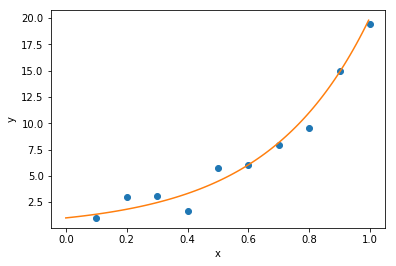

In [4]:
plt.plot(x,y, 'o')
plt.plot(x_t[:100], y_t[:100], '-')
plt.xlabel('x'); plt.ylabel('y')

Use scikit-learn to fit a linear model to data

In [5]:
LR = lm.LinearRegression()

The input data format for sklearn is `x[nd,nf]`, where:
* nf = number features
* nd = number of samples/observations

In our case here, `nf=1`.

In [6]:
xd = x[:, np.newaxis]
x.shape, xd.shape

((10,), (10, 1))

Train the model using data (xd, y). 

In [7]:
LR.fit(xd, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predict using the trained model

In [8]:
x_t[:, np.newaxis].shape

(200, 1)

In [9]:
y_lr = LR.predict(x_t[:, np.newaxis])

Visualize the trained model

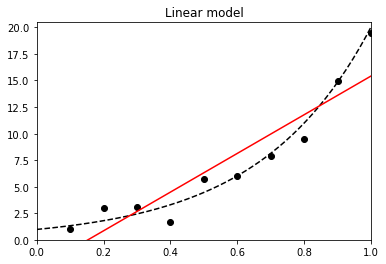

In [10]:
plt.plot(x_t, y_t, 'k--')
plt.plot(x, y, 'ko')
plt.plot(x_t, y_lr, 'r-')
plt.ylim(y.min()-1, y.max()+1)
plt.xlim(0,1)
plt.title('Linear model')

## Fitting a polynomial model

expand the training data x into:
```
[x**0, x**1, x**2, x**3, ..., x**N]    # (N+1 columns)
```

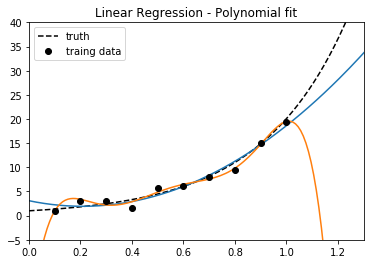

In [11]:
lr2 = lm.LinearRegression()
plt.plot(x_t, y_t, 'k--', label='truth')
for order in [2,6]:
    xp = np.vander(x, order+1)   # [x**0 x**1 x**2 ...]
    lr2.fit(xp, y)
    
    x_tp = np.vander(x_t, order+1)  
    y_lt = lr2.predict(x_tp)
    plt.plot(x_t, y_lt)
    
plt.xlim(0,1.3)
plt.ylim(-5,40)
plt.plot(x, y, 'ko', label='traing data')
plt.title("Linear Regression - Polynomial fit")
plt.legend()

## Linear regression with regularization

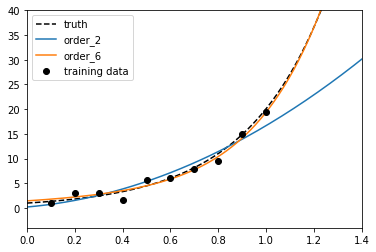

In [7]:
ridge = lm.RidgeCV()
plt.plot(x_t, y_t, 'k--', label='truth')

for order in [2, 6]:
    ridge.fit(np.vander(x, order+1), y)
    y_ridge = ridge.predict(np.vander(x_t, order+1))
    
    plt.plot(x_t, y_ridge, label='order_{}'.format(order))
    
plt.plot(x, y, 'ko', label='training data')
plt.xlim(0, 1.4)
plt.ylim(-4, 40)
plt.legend()